# Assignment 1
Shuman Zhao

### Importing needed packages

In [114]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
    import statsmodels.api as sm
import numpy as np
from scipy import stats
%matplotlib inline

### Reading the data in

In [116]:
df = pd.read_csv("/Users/zhaoshuman/Documents/Master/MIE/2024Fall/MIE1624/A1/clean_kaggle_data_2024.csv")

# display first 5 rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat,ConvertedCompYearly
0,73,I am a developer by profession,18-24,"Employed, full-time;Student, full-time;Indepen...",Hybrid,Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,10.0,75.0,65.0,100.0,100.0,100.0,50.0,90.0,10.0,7322.0
1,380,I am a developer by profession,35-44,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,91295.0
2,390,I am a developer by profession,25-34,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,0.0,0.0,20.0,30.0,5.0,20.0,10.0,5.0,10.0,110000.0
3,393,I am a developer by profession,35-44,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects,Professional degree,Books / Physical media,NaN,...,0.0,10.0,30.0,5.0,10.0,0.0,0.0,5.0,7.0,161044.0
4,399,I am a developer by profession,45-54,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,30.0,10.0,30.0,0.0,0.0,0.0,5.0,195000.0


### Question 1: Data Exploration

In [118]:
# Summarize the data
df.describe()

,ResponseId,YearsCode,YearsCodePro,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat,ConvertedCompYearly
count,12209.000000,12209.000000,12209.000000,1.220900e+04,12166.000000,12134.000000,12160.000000,12172.000000,12188.000000,12189.000000,12191.000000,12186.000000,12190.000000,12186.000000,12209.000000,1.220900e+04
mean,20297.735687,14.303956,9.632075,3.049833e+07,10.765823,19.770026,7.655859,10.775776,25.621767,24.822451,21.672570,17.354325,12.038331,10.855449,6.940126,8.432007e+04
std,11633.678037,9.214786,7.988643,6.564029e+08,8.637580,26.232043,18.502650,22.464719,27.206669,27.316410,26.614071,25.482397,23.802943,22.517018,2.083906,1.861754e+05
min,73.000000,0.000000,0.000000,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000e+02
25%,10146.000000,8.000000,4.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.040400e+04
50%,20167.000000,12.000000,7.000000,1.200000e+05,8.000000,10.000000,0.000000,0.000000,20.000000,20.000000,12.000000,10.000000,0.000000,0.000000,7.000000,6.444400e+04
75%,29948.000000,19.000000,13.000000,3.360000e+05,15.000000,25.000000,5.000000,10.000000,30.000000,30.000000,30.000000,20.000000,10.000000,10.000000,8.000000,1.074060e+05
max,41187.000000,50.000000,50.000000,4.800000e+10,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,10.000000,1.381802e+07


In [119]:
# Number of rows and columns in the data
df.shape

(12209, 112)

In [120]:
# Display column names
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'JobSat', 'ConvertedCompYearly'],
      dtype='object', length=112)

### Data Exploration for selected columns

In [122]:
viz = df[['Country','DevType','Age','EdLevel','RemoteWork','YearsCode','AIThreat','JobSat','ConvertedCompYearly']]
viz.head()

,Country,DevType,Age,EdLevel,RemoteWork,YearsCode,AIThreat,JobSat,ConvertedCompYearly
0,Pakistan,Data scientist or machine learning specialist,18-24,Secondary school,Hybrid,3,No,10.0,7322.0
1,Turkey,Data scientist or machine learning specialist,35-44,Master’s degree,Remote,15,No,10.0,91295.0
2,United States of America,Student,25-34,Some college/university study without earning ...,Remote,7,No,10.0,110000.0
3,Great Britain,Engineering manager,35-44,Professional degree,Hybrid,32,No,7.0,161044.0
4,United States of America,"Developer, full-stack",45-54,Some college/university study without earning ...,Remote,38,No,5.0,195000.0


In [123]:
# descriptive statistics for selected columns
viz.describe()

,YearsCode,JobSat,ConvertedCompYearly
count,12209.000000,12209.000000,1.220900e+04
mean,14.303956,6.940126,8.432007e+04
std,9.214786,2.083906,1.861754e+05
min,0.000000,0.000000,1.040000e+02
25%,8.000000,6.000000,3.040400e+04
50%,12.000000,7.000000,6.444400e+04
75%,19.000000,8.000000,1.074060e+05
max,50.000000,10.000000,1.381802e+07


### Graphical Figures

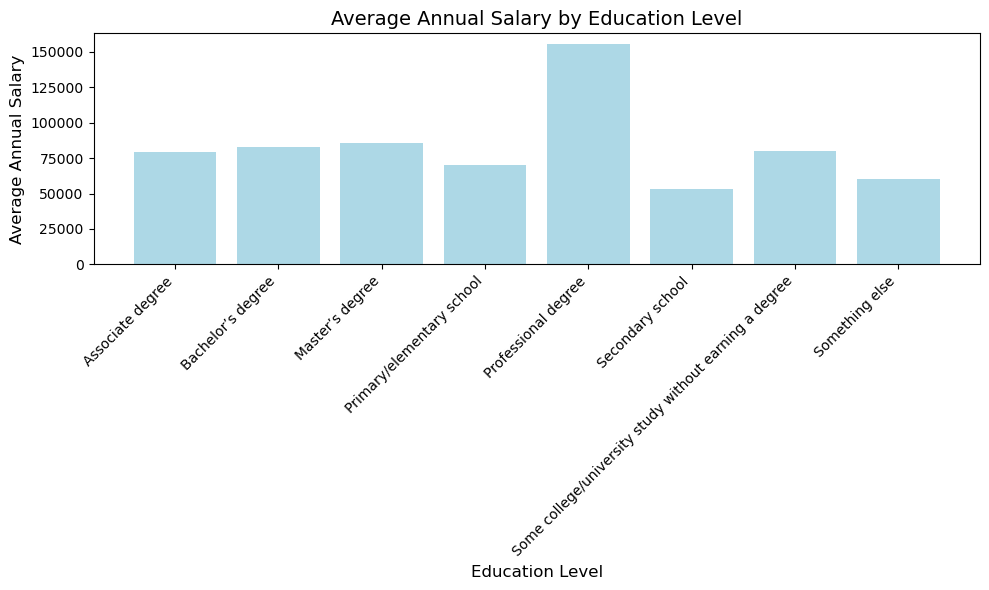

In [125]:
# Calculate the mean salary for each education level
avg_salary_by_education = df.groupby('EdLevel')['ConvertedCompYearly'].mean()

# Plotting the bar chart for education level vs. average salary
plt.figure(figsize=(10, 6))  # Set the figure size

# Bar plot
plt.bar(avg_salary_by_education.index, avg_salary_by_education.values, color='lightblue')

# Add labels and title
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Average Annual Salary", fontsize=12)
plt.title("Average Annual Salary by Education Level", fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjusts the layout to prevent label cutoff
plt.show()

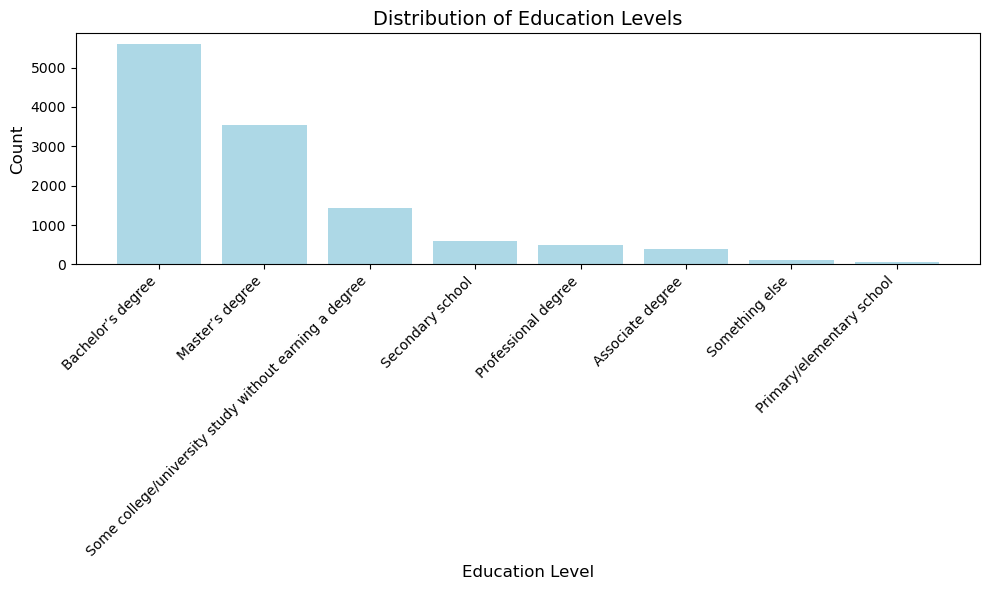

In [126]:
# Count the occurrences of each education level
education_counts = df['EdLevel'].value_counts()

# Plotting the bar chart for the distribution of education levels
plt.figure(figsize=(10, 6))  # Set the figure size

# Bar plot
plt.bar(education_counts.index, education_counts.values, color='lightblue')

# Add labels and title
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Education Levels", fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjusts the layout to prevent label cutoff
plt.show()

In [127]:
# job satisfaction vs. job title
# calculate average satisfaction for different job titles
av_sat = df.groupby('DevType')['JobSat'].mean().reset_index()

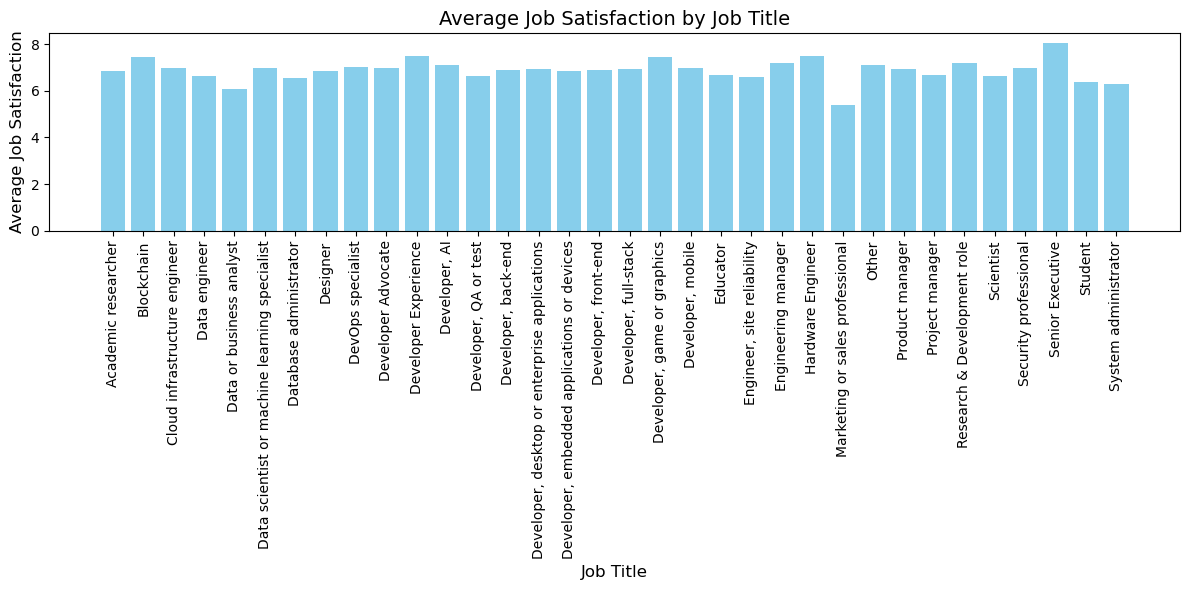

In [128]:
# Plotting the bar chart for job satisfaction by job title
plt.figure(figsize=(12, 6))  # Set the figure size to make the plot clearer

# Bar plot
plt.bar(av_sat['DevType'], av_sat['JobSat'], color='skyblue')

# Add labels and title
plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Average Job Satisfaction", fontsize=12)
plt.title("Average Job Satisfaction by Job Title", fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()  # Adjusts the layout to prevent label cutoff
plt.show()

### Question 2: Finding difference

#### a

In [131]:
# Compute and report descriptive statistics for the two groups of in-person and remote job modes
# Select columns by name
adf=df[['RemoteWork','ConvertedCompYearly']]

job_mode = adf.groupby('RemoteWork')
job_mode.describe()

ConvertedCompYearly                                                \
                         count          mean            std    min       25%   
RemoteWork                                                                     
Hybrid                  5272.0  84515.642830  241457.587966  109.0  37081.75   
In-person               1948.0  59382.189938  123254.766188  123.0  12889.00   
Remote                  4989.0  93850.616356  130228.134228  104.0  36000.00   

                                            
                50%        75%         max  
RemoteWork                                  
Hybrid      64444.0  101910.00  13818022.0  
In-person   36518.0   72000.25   3367716.0  
Remote      74595.0  127388.00   6340564.0

In [132]:
# code in this part are partially from Chatpgt
# check for missing values
print(df[['RemoteWork', 'ConvertedCompYearly']].isna().sum()) # no missing values in 2 columns

# remove outlier
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    
# Filter the data for 'Remote' and 'In-person'
remote_jobs = df[df['RemoteWork'] == 'Remote']
in_person_jobs = df[df['RemoteWork'] == 'In-person']

# Remove outliers in the 'ConvertedCompYearly' column for both groups
remote_clean = remove_outliers(remote_jobs, 'ConvertedCompYearly')
in_person_clean = remove_outliers(in_person_jobs, 'ConvertedCompYearly')

# Combine the cleaned data for further analysis
cleaned_data = pd.concat([remote_clean, in_person_clean])

# Display the shape of the cleaned dataset
print(cleaned_data.shape)

# Check number of outliers removed
print(remote_clean.shape) # remote after removing
print(remote_jobs.shape) # remote before removing
print(in_person_clean.shape) # in-person after removing 
print(in_person_jobs.shape) # in-person before removing

RemoteWork             0
ConvertedCompYearly    0
dtype: int64
(6697, 112)
(4852, 112)
(4989, 112)
(1845, 112)
(1948, 112)


#### b

#### manual calculation for two-sample t-test

In [135]:
# codes in this part are partially from Chatgpt
# Extracting salary data for in-person and remote job modes
in_person_salaries = in_person_clean['ConvertedCompYearly']
remote_salaries = remote_clean['ConvertedCompYearly']

# Step 1: Calculate the means
mean_in_person = np.mean(in_person_salaries)
mean_remote = np.mean(remote_salaries)

# Step 2: Calculate the variances
var_in_person = np.var(in_person_salaries, ddof=1)  # ddof=1 for sample variance
var_remote = np.var(remote_salaries, ddof=1)

# Step 3: Sample sizes
n_in_person = len(in_person_salaries)
n_remote = len(remote_salaries)

# Step 4: Calculate the pooled standard deviation
pooled_std = np.sqrt(((n_in_person - 1) * var_in_person + (n_remote - 1) * var_remote) / (n_in_person + n_remote - 2))

# Step 5: Calculate the t-statistic
t_statistic = (mean_remote - mean_in_person) / (pooled_std * np.sqrt(1/n_in_person + 1/n_remote))
print(f"manual two-sample t-statistic: {t_statistic}")

# Step 5: Calculate the t-statistic
# using welch test because the variances are different
t_statistic_welch = (mean_remote - mean_in_person) / np.sqrt((var_in_person/n_in_person) + (var_remote/n_remote))
# Output the t-statistic and degrees of freedom
print(f"Welch's t-statistic: {t_statistic_welch}")

manual two-sample t-statistic: 26.37991194667647
Welch's t-statistic: 32.30051734614891


#### using two-sample t-test

In [137]:
# codes in this part are from lecture material
# compute means
print (job_mode.mean())

# 2 sample t-test
remote = cleaned_data[cleaned_data['RemoteWork'] == 'Remote']['ConvertedCompYearly']
in_person = cleaned_data[cleaned_data['RemoteWork'] == 'In-person']['ConvertedCompYearly']
# Perform Welch's t-test (equal_var=False specifies that we are not assuming equal variances)
tc, pc = stats.ttest_ind(remote, in_person, equal_var=False)
print("Welch's t-test: t = %g  p = %g" % (tc, pc))

            ConvertedCompYearly
RemoteWork                     
Hybrid             84515.642830
In-person          59382.189938
Remote             93850.616356
Welch's t-test: t = 32.3005  p = 3.62024e-209


P value smaller than 0.05 is significant, so we conclude that the salary mean for remote mode is significantly greater than for in-person mode. Compared to the manual calculation, the magnitude of t-statistics is approximately the same. However, python's built-in function also provides the p-value, which can be used to compare to 0.05 (95% confidence level) and decide the result. 

#### Check assumptions

In [140]:
# codes in this part are from Chargpt
# Check normality with Shapiro-Wilk test
shapiro_in_person = stats.shapiro(in_person_salaries)
shapiro_remote = stats.shapiro(remote_salaries)

print(f"Shapiro-Wilk Test for In-Person: {shapiro_in_person}")
print(f"Shapiro-Wilk Test for Remote: {shapiro_remote}")

Shapiro-Wilk Test for In-Person: ShapiroResult(statistic=0.8996555926189317, pvalue=3.892618122022896e-33)
Shapiro-Wilk Test for Remote: ShapiroResult(statistic=0.9453917417113694, pvalue=4.190207885606065e-39)


Because both p-value are smaller than 0.05 therefore significant, the null hypothesis that "the data is normally distributed" is rejected. Therefore we conclude that the data of both groups are not normally distributed. 

In [142]:
# codes in this part are from Chatgpt
# Check equal variance with Levene's test
levene_test = stats.levene(in_person_salaries, remote_salaries)

print(f"Levene's Test for Equal Variance: {levene_test}")

Levene's Test for Equal Variance: LeveneResult(statistic=391.86751850465316, pvalue=8.334115672795999e-85)


Because the p-value is smaller than 0.05, it's significant. The null hypothesis that "two groups' variances are equal" is rejected. We conclude that the assumption of equal variance is invalid in this case.

### c

39663.393956988395


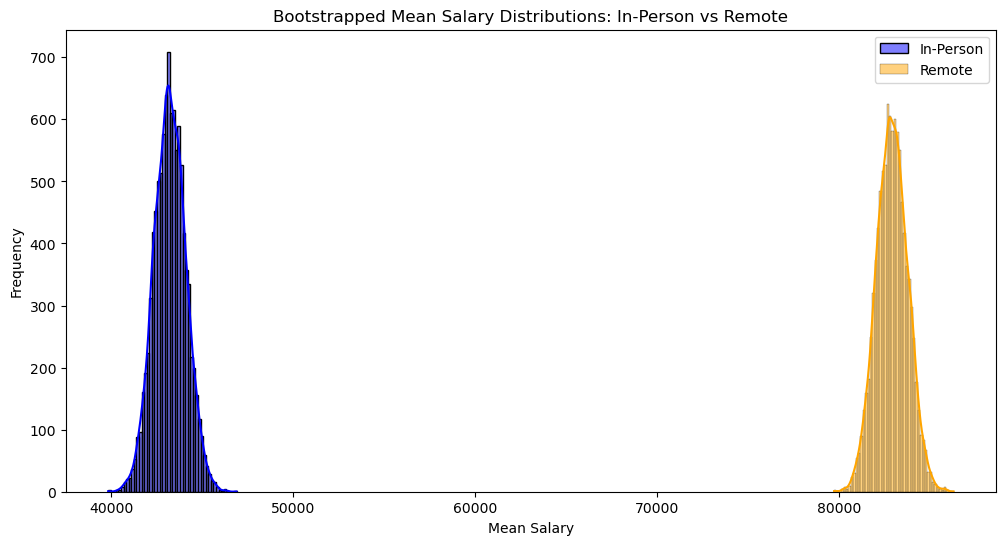

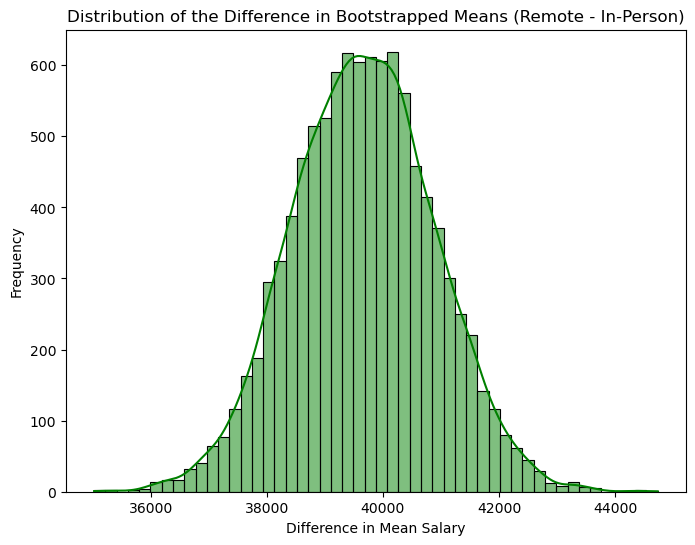

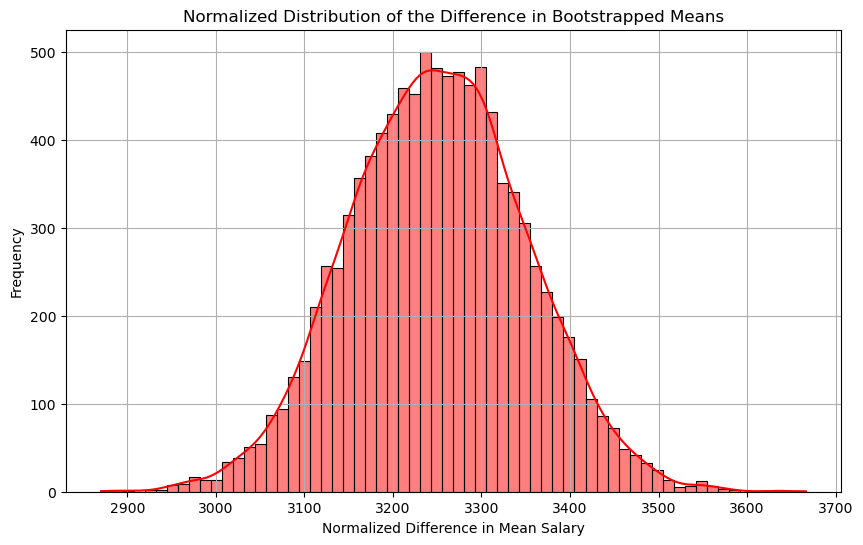

In [145]:
import seaborn as sns
# Use 10000 replications for bootstrap of two groups
n_replications = 10000

# Bootstrap sampling and mean calculation
in_person_means = [
    np.mean(np.random.choice(in_person_clean['ConvertedCompYearly'], size=len(in_person_clean), replace=True)) for _ in range(n_replications)
]

remote_means = [
    np.mean(np.random.choice(remote_clean['ConvertedCompYearly'], size=len(remote_clean), replace=True)) for _ in range(n_replications)
]

diff_in_means = np.array(remote_means) - np.array(in_person_means)
print(diff_in_means.mean())

# Normalize the difference in means
remote_means_variance = np.var(remote_means)
in_person_means_variance = np.var(in_person_means)
pooled_se = np.sqrt((remote_means_variance/len(remote_means)) + (in_person_means_variance/len(in_person_means)))
means_diff_norm = diff_in_means / pooled_se # lecture

# Figure 1: Distributions of Bootstrapped Means for In-Person and Remote Workers
plt.figure(figsize=(12, 6))
sns.histplot(in_person_means, color='blue', kde=True, label='In-Person', bins=50)
sns.histplot(remote_means, color='orange', kde=True, label='Remote', bins=50)
plt.title('Bootstrapped Mean Salary Distributions: In-Person vs Remote')
plt.xlabel('Mean Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Figure 2: Distribution of the Difference in Means
plt.figure(figsize=(8, 6))
sns.histplot(diff_in_means, color='green', kde=True, bins=50)
plt.title('Distribution of the Difference in Bootstrapped Means (Remote - In-Person)')
plt.xlabel('Difference in Mean Salary')
plt.ylabel('Frequency')
plt.show()

# Figure 3: Normalized Distribution of the Difference in Means (mean should = t-statistics)!!!
plt.figure(figsize=(10, 6))
sns.histplot(means_diff_norm, color='red', kde=True)
plt.title('Normalized Distribution of the Difference in Bootstrapped Means')
plt.xlabel('Normalized Difference in Mean Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### d

In [147]:
# codes in this part are from lecture material
# compute means
tc, pc = stats.ttest_ind(remote_means, in_person_means)
print ("Two-sample t-test: t = %g  p = %g" % (tc, pc))

# Perform Welch's t-test (equal_var=False specifies that we are not assuming equal variances)
tc, pc = stats.ttest_ind(remote_means, in_person_means, equal_var=False)
print("Welch's t-test: t = %g  p = %g" % (tc, pc))

Two-sample t-test: t = 3250.47  p = 0
Welch's t-test: t = 3250.47  p = 0


P-value is smaller than 0.05. So we significantly reject the null hypothesis that "Two means are equal". The conclusion is mean of salary for two groups are different to each other. Compared to 2(b), the p-value are both smaller than 0.05, and the p-value in 2(b) is smaller than in (d). Besides, the t-statistic in d is much larger than in 2(b). 

### Question 3: education level column (“EdLevel”)

In [150]:
df_ed = df[['EdLevel']]
print(df_ed)

                                                 EdLevel
0                                       Secondary school
1                                        Master’s degree
2      Some college/university study without earning ...
3                                    Professional degree
4      Some college/university study without earning ...
...                                                  ...
12204                                  Bachelor’s degree
12205                                  Bachelor’s degree
12206                                  Bachelor’s degree
12207                                   Secondary school
12208  Some college/university study without earning ...

[12209 rows x 1 columns]


#### a

In [152]:
df_ed = df[['EdLevel', 'ConvertedCompYearly']]
degree = df_ed.groupby('EdLevel')
degree.describe()

ConvertedCompYearly  \
                                                                 count   
EdLevel                                                                  
Associate degree                                                 403.0   
Bachelor’s degree                                               5592.0   
Master’s degree                                                 3537.0   
Primary/elementary school                                         62.0   
Professional degree                                              489.0   
Secondary school                                                 603.0   
Some college/university study without earning a...              1422.0   
Something else                                                   101.0   

                                                                   \
                                                             mean   
EdLevel                                                             
Associate degree                                     79056.397022   
Bachelor’s degree                                    82685.918634   
Master’s degree                                      85714.912072   
Primary/elementary school                            69933.322581   
Professional degree                                 155296.527607   
Secondary school                                     53072.116086   
Some college/university study without earning a...   79966.442335   
Something else                                       60000.356436   

                                                                          \
                                                              std    min   
EdLevel                                                                    
Associate degree                                    114976.063034  371.0   
Bachelor’s degree                                   127595.706976  115.0   
Master’s degree                                     102478.997686  104.0   
Primary/elementary school                            67621.184297  299.0   
Professional degree                                 747206.128939  132.0   
Secondary school                                     43037.894298  123.0   
Some college/university study without earning a...   93471.051062  132.0   
Something else                                       46724.259922  494.0   

                                                                      \
                                                        25%      50%   
EdLevel                                                                
Associate degree                                    29946.5  61840.0   
Bachelor’s degree                                   25525.5  63000.0   
Master’s degree                                     39740.0  68203.0   
Primary/elementary school                           14583.5  50300.0   
Professional degree                                 50885.0  82526.0   
Secondary school                                    19440.5  45784.0   
Some college/university study without earning a...  28658.0  59180.5   
Something else                                      26852.0  53703.0   

                                                                           
                                                          75%         max  
EdLevel                                                                    
Associate degree                                    100137.50   2014062.0  
Bachelor’s degree                                   114018.50   6340564.0  
Master’s degree                                     103000.00   2153432.0  
Primary/elementary school                           109680.75    305229.0  
Professional degree                                 128887.00  13818022.0  
Secondary school                                     73140.00    300000.0  
Some college/university study without earning a...  102000.00   1562898.0  
Something else                                       81629.00    306396.0

In [153]:
# check for missing values
print(df[['EdLevel', 'ConvertedCompYearly']].isna().sum()) # no missing values in 2 columns
print(df['EdLevel'].unique())

EdLevel                0
ConvertedCompYearly    0
dtype: int64
['Secondary school' 'Master’s degree'
 'Some college/university study without earning a degree'
 'Professional degree' 'Bachelor’s degree' 'Associate degree'
 'Primary/elementary school' 'Something else']


In [154]:
# Filter the data for 'Bachelor', 'Master' and 'Professional'
bachelor = df[df['EdLevel'] == "Bachelor’s degree"]
master = df[df['EdLevel'] == "Master’s degree"]
professional = df[df['EdLevel'] == 'Professional degree']

# Remove outliers in the 'ConvertedCompYearly' column for 3 groups
bachelor_clean = remove_outliers(bachelor, 'ConvertedCompYearly')
master_clean = remove_outliers(master, 'ConvertedCompYearly')
professional_clean = remove_outliers(professional, 'ConvertedCompYearly')

# Combine the cleaned data for further analysis
cleaned_data = pd.concat([bachelor_clean, master_clean, professional_clean])

# Display the shape of the cleaned dataset
print(cleaned_data.shape)

# Check number of outliers removed
print(bachelor_clean.shape) # bachelor after removing
print(bachelor.shape) # bachelor before removing
print(master_clean.shape) # master after removing 
print(master.shape) # master before removing
print(professional_clean.shape) # professional after removing 
print(professional.shape) # professional before removing

(9209, 112)
(5427, 112)
(5592, 112)
(3326, 112)
(3537, 112)
(456, 112)
(489, 112)


#### b

In [156]:
# codes in this part are partially from ChatGpt
# ANOVA test
anova_data = cleaned_data[['EdLevel', 'ConvertedCompYearly']]

from statsmodels.formula.api import ols
# OLS (Ordinary Least Squares) Regression Model
model = ols('ConvertedCompYearly ~ C(EdLevel)', data=anova_data).fit()

# Perform the ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# Output the ANOVA table
print(anova_table)

                  sum_sq      df          F        PR(>F)
C(EdLevel)  1.228599e+11     2.0  22.617434  1.590109e-10
Residual    2.500390e+13  9206.0        NaN           NaN


P-value is smaller than 0.05, therefore we reject the null hypothesis that "there is no difference between 3 groups" and conclude that there is a significant difference in the salary mean between at least two of the groups.

#### Check Assumptions

In [159]:
# codes in this part are from Chargpt
# Check normality with Shapiro-Wilk test
import warnings
warnings.filterwarnings("ignore")
shapiro_bachelor = stats.shapiro(bachelor_clean['ConvertedCompYearly'])
shapiro_master = stats.shapiro(master_clean['ConvertedCompYearly'])
shapiro_professional = stats.shapiro(professional_clean['ConvertedCompYearly'])

print(f"Shapiro-Wilk Test for Bachelor: {shapiro_bachelor}")
print(f"Shapiro-Wilk Test for Master: {shapiro_master}")
print(f"Shapiro-Wilk Test for Professional: {shapiro_professional}")

Shapiro-Wilk Test for Bachelor: ShapiroResult(statistic=0.9292300526165159, pvalue=6.036394967500371e-45)
Shapiro-Wilk Test for Master: ShapiroResult(statistic=0.9669939623216292, pvalue=5.679046148717067e-27)
Shapiro-Wilk Test for Professional: ShapiroResult(statistic=0.9476171107050633, pvalue=1.2813381188557117e-11)


In [160]:
# codes in this part are from Chatgpt
# Check equal variance with Levene's test
levene_test = stats.levene(bachelor_clean['ConvertedCompYearly'], master_clean['ConvertedCompYearly'], professional_clean['ConvertedCompYearly'])

print(f"Levene's Test for Equal Variance: {levene_test}")

Levene's Test for Equal Variance: LeveneResult(statistic=110.59448867600966, pvalue=3.4462826272177964e-48)


### c

2336.8516607729043
-17481.441664122383
-15144.59000334948


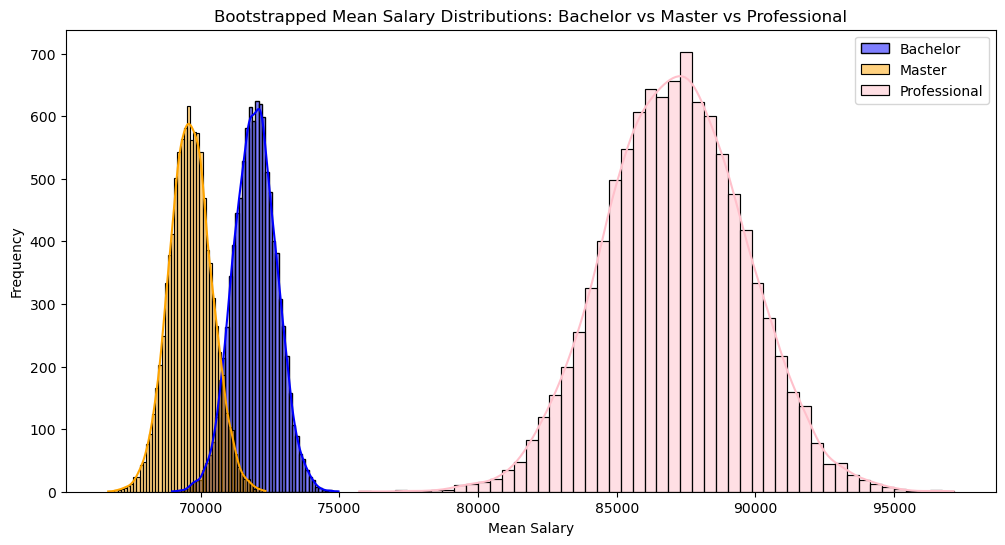

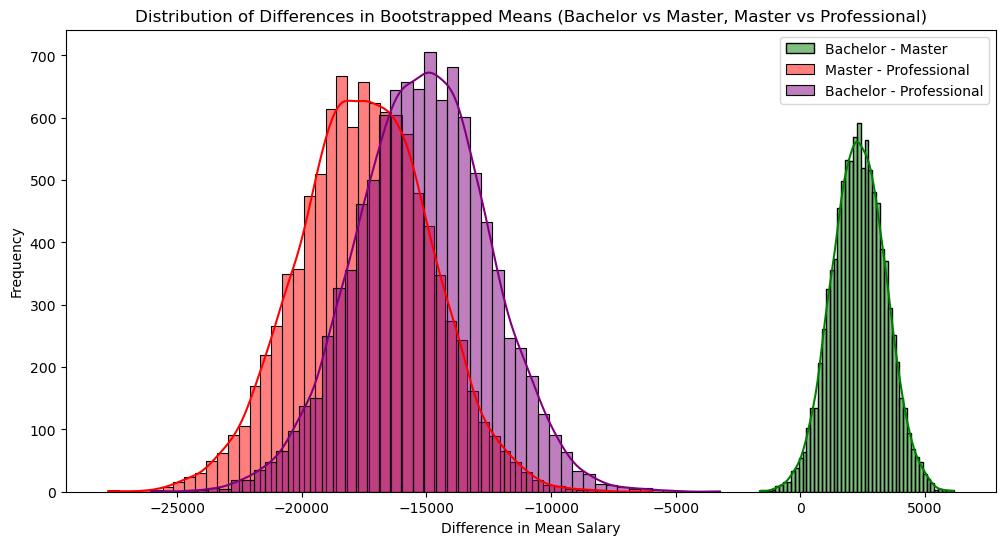

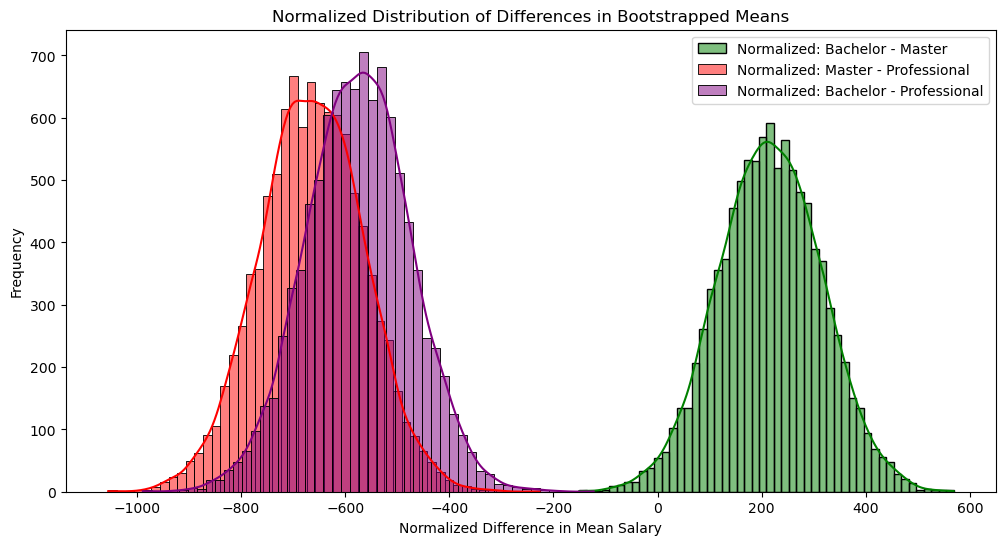

In [162]:
import seaborn as sns

#code in this part are from Chatgpt
n_replications = 10000

# Bootstrap sampling and mean calculation
bachelor_means = [
    np.mean(np.random.choice(bachelor_clean['ConvertedCompYearly'], size=len(bachelor_clean), replace=True)) for _ in range(n_replications)
]

master_means = [
    np.mean(np.random.choice(master_clean['ConvertedCompYearly'], size=len(master_clean), replace=True)) for _ in range(n_replications)
]

professional_means = [
    np.mean(np.random.choice(professional_clean['ConvertedCompYearly'], size=len(professional_clean), replace=True)) for _ in range(n_replications)
]

diff_bachelor_master = np.array(bachelor_means) - np.array(master_means)
diff_master_professional = np.array(master_means) - np.array(professional_means)
diff_bachelor_professional = np.array(bachelor_means) - np.array(professional_means)

print(diff_bachelor_master.mean())
print(diff_master_professional.mean())
print(diff_bachelor_professional.mean())

# Normalize the difference in means
# difference between bachelor and master
bachelor_means_variance = np.var(bachelor_means)
master_means_variance = np.var(master_means)
pooled_se_1 = np.sqrt((bachelor_means_variance/len(bachelor_means)) + (master_means_variance/len(master_means)))
diff_bachelor_master_norm = diff_bachelor_master / pooled_se_1
# difference between master and professional
professional_means_variance = np.var(professional_means)
pooled_se_2 = np.sqrt((master_means_variance/len(master_means)) + (professional_means_variance/len(professional_means)))
diff_master_professional_norm = diff_master_professional / pooled_se_2
# difference between bachelor and professional
pooled_se_3 = np.sqrt((bachelor_means_variance/len(bachelor_means)) + (professional_means_variance/len(professional_means)))
diff_bachelor_professional_norm = diff_bachelor_professional / pooled_se_3 
    
# Plot the three figures

# Figure 1: Distributions of Bootstrapped Means for In-Person and Remote Workers
plt.figure(figsize=(12, 6))
sns.histplot(bachelor_means, color='blue', kde=True, label='Bachelor', bins=50)
sns.histplot(master_means, color='orange', kde=True, label='Master', bins=50)
sns.histplot(professional_means, color='pink', kde=True, label='Professional', bins=50)
plt.title('Bootstrapped Mean Salary Distributions: Bachelor vs Master vs Professional')
plt.xlabel('Mean Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Figure 2: Distribution of the Differences in Bootstrapped Means (Bachelor vs Master, Master vs Professional)
plt.figure(figsize=(12, 6))
sns.histplot(diff_bachelor_master, color='green', kde=True, label='Bachelor - Master', bins=50)
sns.histplot(diff_master_professional, color='red', kde=True, label='Master - Professional', bins=50)
sns.histplot(diff_bachelor_professional, color='purple', kde=True, label='Bachelor - Professional', bins=50)
plt.title('Distribution of Differences in Bootstrapped Means (Bachelor vs Master, Master vs Professional)')
plt.xlabel('Difference in Mean Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Figure 3: Normalized Distribution of Differences in Bootstrapped Means
plt.figure(figsize=(12, 6))
sns.histplot(diff_bachelor_master_norm, color='green', kde=True, label='Normalized: Bachelor - Master', bins=50)
sns.histplot(diff_master_professional_norm, color='red', kde=True, label='Normalized: Master - Professional', bins=50)
sns.histplot(diff_bachelor_professional_norm, color='purple', kde=True, label='Normalized: Bachelor - Professional', bins=50)
plt.title('Normalized Distribution of Differences in Bootstrapped Means')
plt.xlabel('Normalized Difference in Mean Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### d

In [164]:
# codes in this part are from ChatGpt
# Step 1: Combine the bootstrapped means into a DataFrame with labels
# Create a DataFrame for each group with the bootstrapped means and the respective group label
bachelor_df = pd.DataFrame({'ConvertedCompYearly': bachelor_means, 'EdLevel': 'Bachelor'})
master_df = pd.DataFrame({'ConvertedCompYearly': master_means, 'EdLevel': 'Master'})
professional_df = pd.DataFrame({'ConvertedCompYearly': professional_means, 'EdLevel': 'Professional'})

# Combine all the DataFrames
anova_data = pd.concat([bachelor_df, master_df, professional_df])

# Step 2: Perform ANOVA test using statsmodels
# Use Ordinary Least Squares (OLS) model to fit the data for ANOVA
model = ols('ConvertedCompYearly ~ C(EdLevel)', data=anova_data).fit()

# Perform the ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 3: Output the ANOVA table and interpret the p-value
print(anova_table)

                  sum_sq       df              F  PR(>F)
C(EdLevel)  1.801401e+12      2.0  359478.796513     0.0
Residual    7.515968e+10  29997.0            NaN     NaN


p-value is smaller than 0.05, therefore we reject the null hypothesis that "there is no difference between 3 groups" and conclude that there is a significant difference in the salary mean between at least two of the groups. The result is the same compared to the result in 3(b). 